# Dynamics Decomposition

In this tutorial, we explore the dynamics decomposition functionality
available in BoolForge's modularity development branch.

## What you will Learn
In this tutorial you will:

- compute the trajectory of a Boolean network
- combine multiple trajectories following the property of equal reachability

## Setup

In [1]:
import boolforge

## Trajectories

A trajectory of a Boolean network is the sequences of states assumed by the
network, given an initial state. A trajectory can be thought of as two
consecutive components: a non-periodic prefix followed by the periodic cycle.
BoolForge attempts to compress trajectories to a minimal representation, consisting
of only the prefix and a single instance of the cycle. Furthermore, all values
are stored in decimal.
For example, the trajectory
$$
T = (00, 01, 11, 00, 01, 01, 11, 00, 01, 01, ...)
$$
is stored as `([0, 1, 3, 0, 1], 4)`, corresponding to:

Prefix: 0
Cycle: 1, 3, 0, 1, 1, 3, 0, 1, ...

in decimal, or

Prefix: 00
Cycle: 01, 11, 00, 01, 01, 11, 00, 01, ...

in binary.

### 1.1 Computing trajectories

To compute a trajectory, you can call the `get_trajectories(...)` method from
any `BooleanNetwork` object. This method expects the network to be non-autonomous,
and thus requires two parameters, each defining half of an input sequence:

- non_periodic_component
- periodic_component

Both of these parameters are a sequence of sequences of integers. Each sequence
of integers defines the states assumed by a specific input node.
For example, the sequence (1, 1, 0, 1, 0, 1, 0, 1, ...) corresponds to:

`
non_periodic_component: [[1]]
periodic_component: [[1, 0]]
`

and the sequence (10, 01, 11, 00, 11, 01, 10, 01, 11, 00, 11, 01, 10, ...)
corresponds to:

`
non_periodic_component: [[], []]
periodic_component: [[1, 0], [0, 1, 1]]
`

We can perform this in code as follows:

In [2]:
bn = boolforge.BooleanNetwork([[0,0,0,1], [0,1], [0, 1]], [[1, 2], [0], [2]])

non_periodic = [[1]]
periodic = [[1, 0]]

T = bn.get_trajectories(non_periodic, periodic)

print("T_00: ", T[0])
print("T_01: ", T[1])
print("T_10: ", T[2])
print("T_11: ", T[3])

T_00:  {0: {}}
T_01:  {2: {}}
T_10:  {3: {}}
T_11:  {0: {}}


Notice that we also pass an additional Boolean parameter. This is because
BoolForge automatically attempts to compress the trajectory representation
into a reduced, graphical format. When the merge_trajectories flag is passed
as True or omitted, `get_trajectories(...)` instead returns a NetworkX graph.

### Plotting trajectories
BoolForge also provides functionality to plot compressed trajectory graphs:

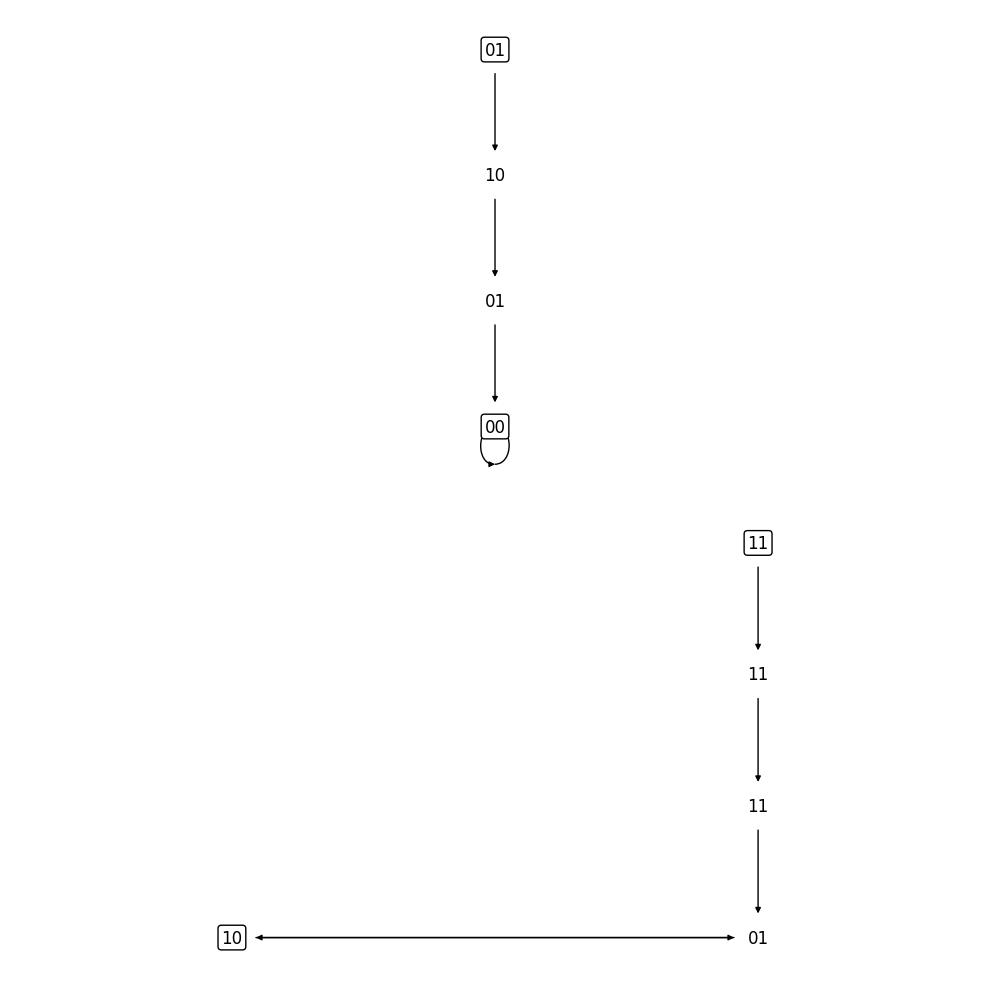

In [3]:
G = bn.get_trajectories(non_periodic, periodic)
boolforge.plot_trajectory(G, show = False);

This process can also be performed manually, by calling `compress_trajectories(...)`
on the list output of `get_trajectories(...)`. However, the `compress_trajectories(...)`
function will require the number of non-input nodes in the network. This value
is automatically computed and passed to the function when the merge_trajectories flag is True.

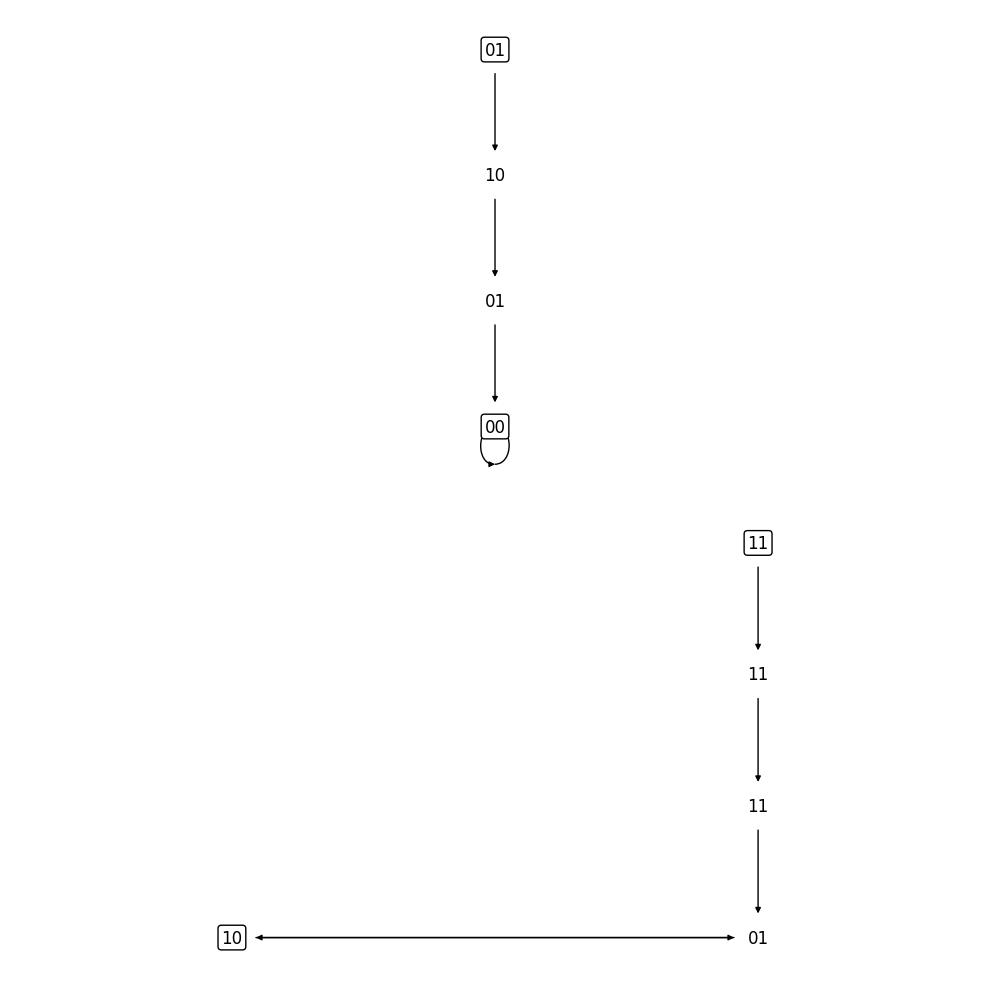

In [4]:
trajectories = bn.get_trajectories(non_periodic_component = non_periodic, 
                                   periodic_component = periodic, 
                                   merge_trajectories = False)
G = boolforge.compress_trajectories(trajectories, 2)
boolforge.plot_trajectory(G, show = False);

### Computing the product of trajectories
Computing the product of two trajectories requires that both trajectories have
already been compressed into the reduced, grapical format. Given two
compressed trajectory graphs, we can compute the product by calling
`product_of_trajectories(...)`.

For example, consider the examples 2.8 and 2.9:

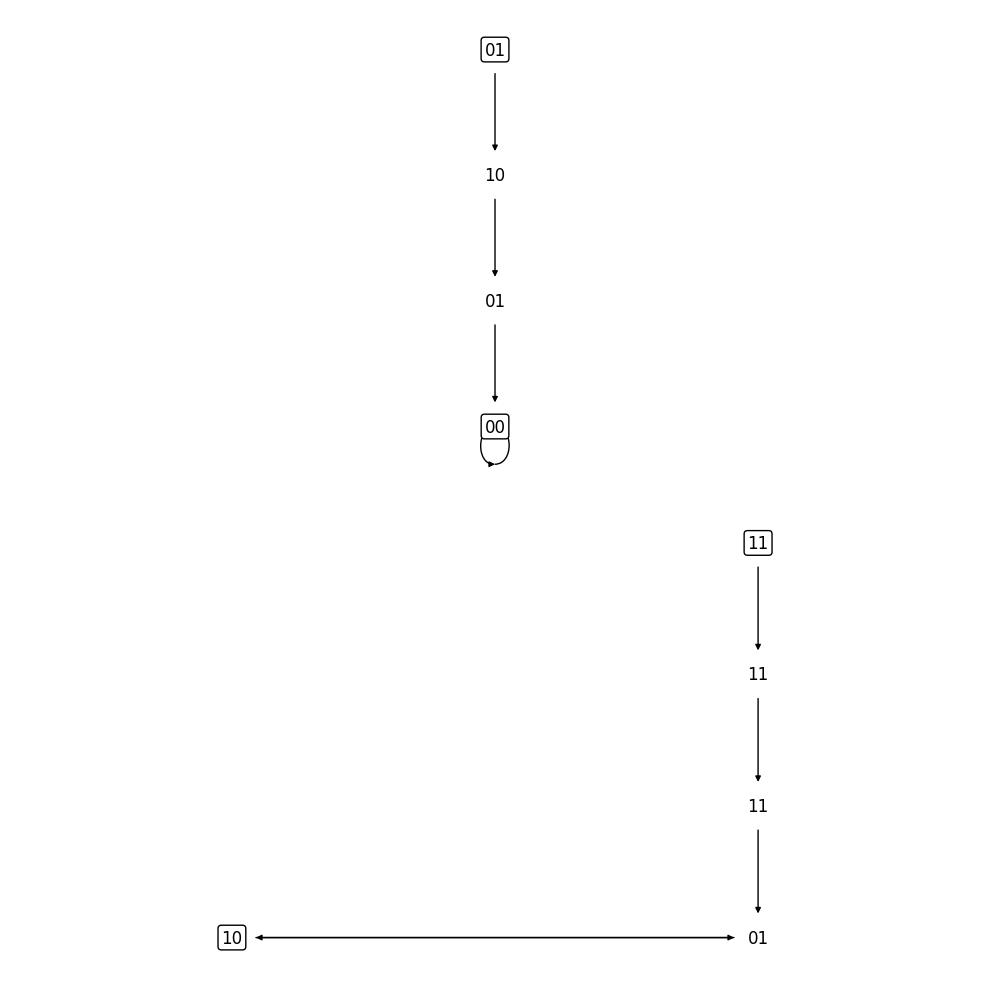

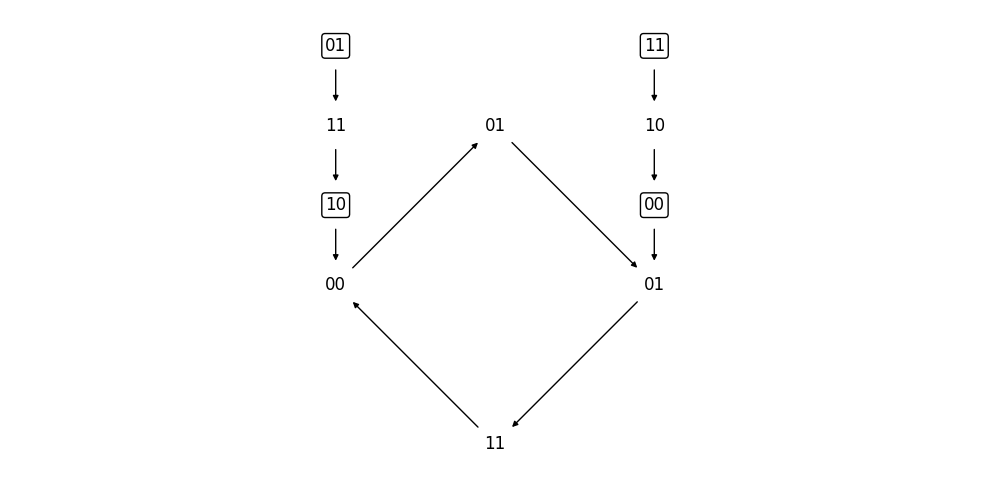

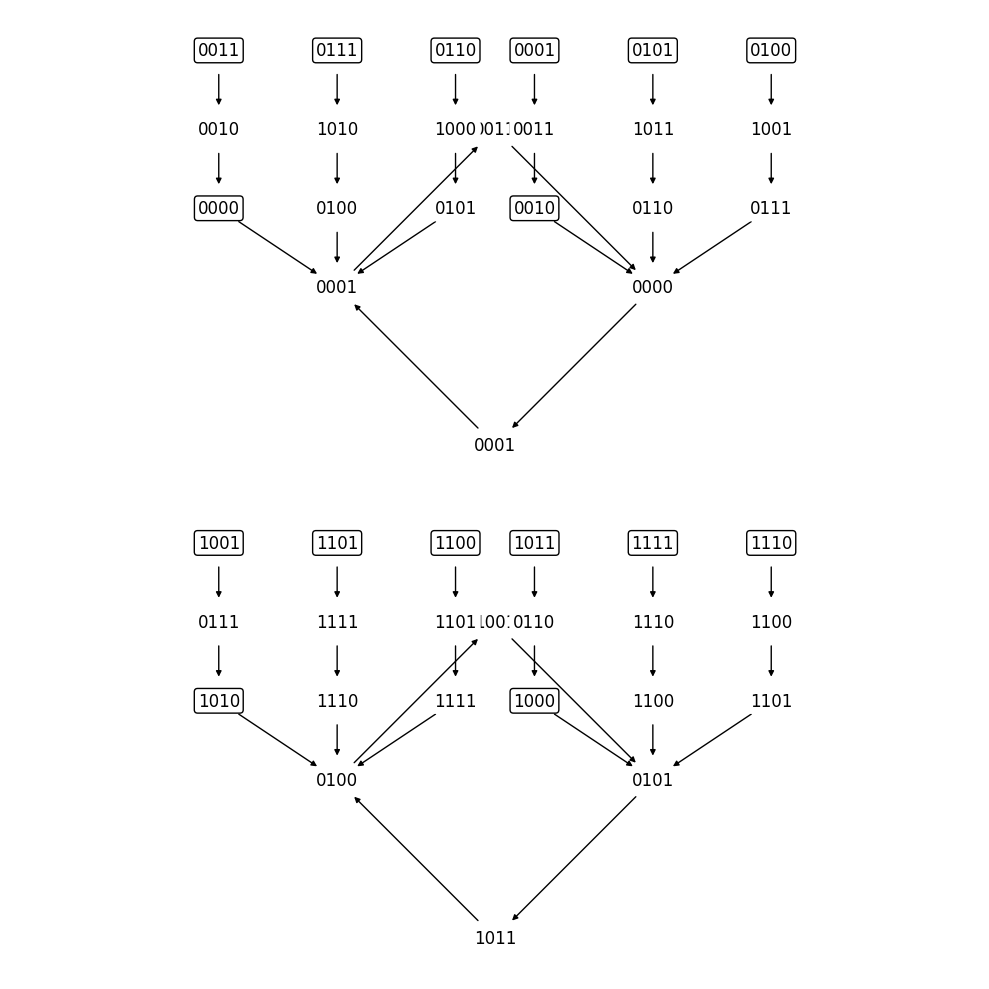

In [5]:
n_2_8 = boolforge.BooleanNetwork([[0,0,0,1], [0,1], [0, 1]], [[1, 2], [0], [2]])
G_2_8 = n_2_8.get_trajectories([[1]], [[1,0]])

n_2_9 = boolforge.BooleanNetwork([[0,0,0,1], [1,0], [0, 1]], [[1, 2], [0], [2]])
G_2_9 = n_2_9.get_trajectories([[1]], [[1,0]])

G = boolforge.product_of_trajectories(G_2_8, G_2_9)

boolforge.plot_trajectory(G_2_8, False);
boolforge.plot_trajectory(G_2_9, False);
boolforge.plot_trajectory(G, False);

## Examples
Everything beyond this point is an implementation of an example
from the Dynamics Decomposition manuscript.

### Example 2.8
This is Example 2.8 from the Dynamics Decomposition manuscript.

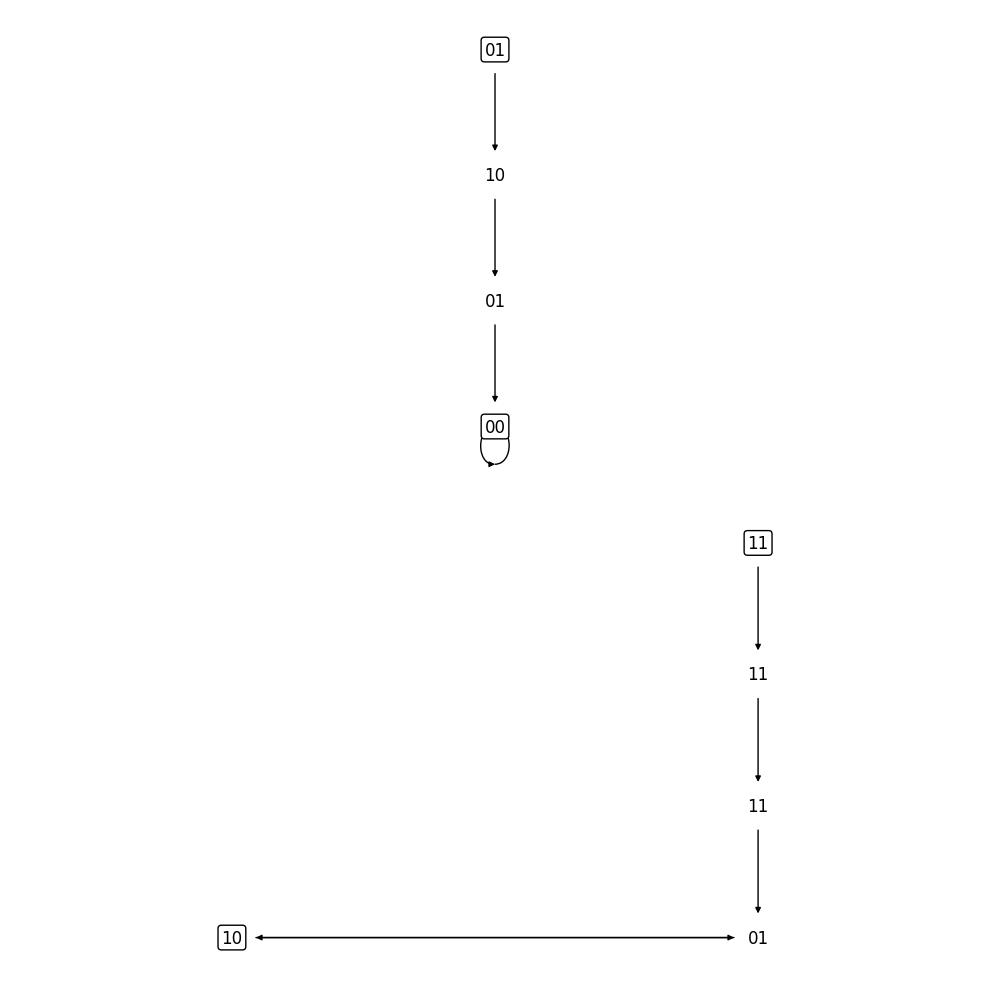

In [6]:
n = boolforge.BooleanNetwork([[0,0,0,1],[0,1],[0,1]],[[1,2],[0],[2]])
boolforge.plot_trajectory(n.get_trajectories([[1]],[[1,0]]), False);

### Example 2.9
This is Example 2.9 from the Dynamics Decomposition manuscript.

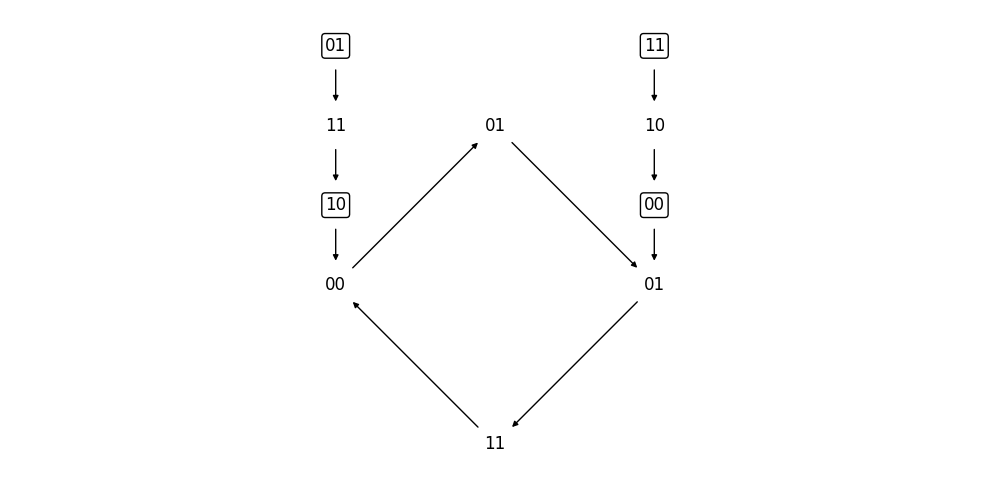

In [7]:
n = boolforge.BooleanNetwork([[0,0,0,1],[1,0],[0,1]],[[1,2],[0],[2]])
boolforge.plot_trajectory(n.get_trajectories([[1]], [[1,0]]), False);

### Example 2.10
This is Example 2.10 from the Dynamics Decomposition manuscript.

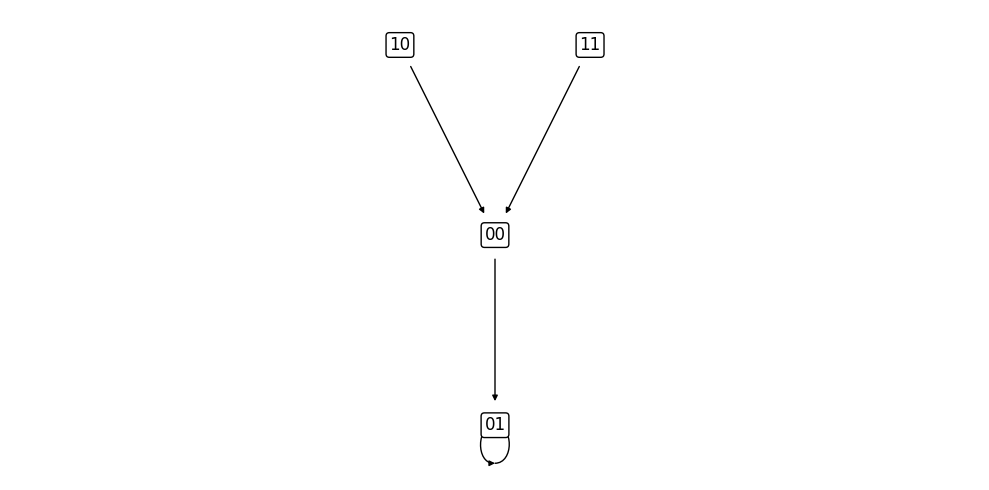

In [8]:
n = boolforge.BooleanNetwork([[0,0,0,1],[1,0],[0,1]],[[1,2],[0],[2]])
boolforge.plot_trajectory(n.get_trajectories([[]], [[0]]), False);

### Example 3.2
This is Example 3.2 from the Dynamics Decomposition manuscript.

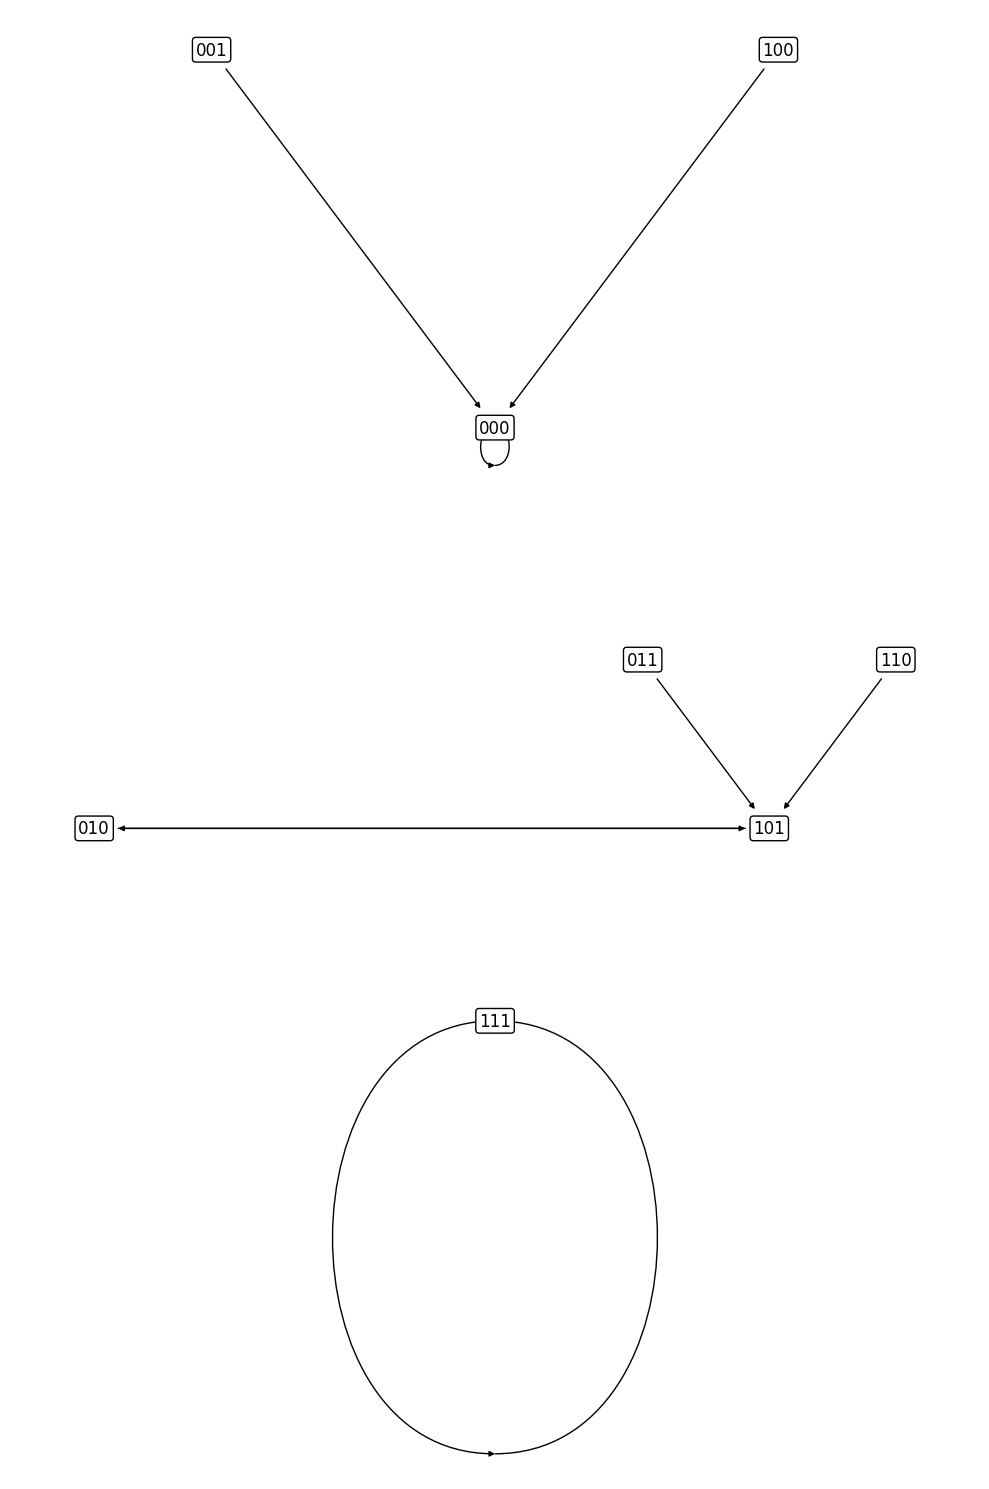

In [9]:
T = [
     ([1,0],1),
     ([4,0],1),
     ([0],1),
     ([3,5,2],2),
     ([6,5,2],2),
     ([2,5],2),
     ([5,2],2),
     ([7],1)
]
G = boolforge.compress_trajectories(T, 3)
boolforge.plot_trajectory(G, False);

### Figure 11
This is Figure 11a from the Dynamics Decomposition manuscript.

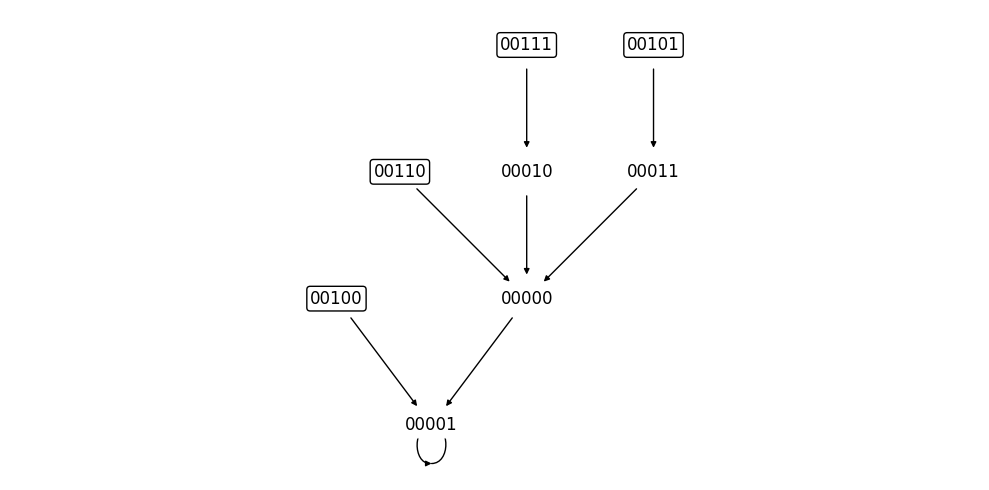

In [10]:
G1 = boolforge.compress_trajectories([([1,0],1)], 3)

T = [([0,1],1),([1,3,0,1],1),([2,0,1],1),([3,2,0,1],1)]
G2 = boolforge.compress_trajectories(T, 2)

boolforge.plot_trajectory(boolforge.product_of_trajectories(G1, G2), False);

This is Figure 11b from the Dynamics Decomposition manuscript.

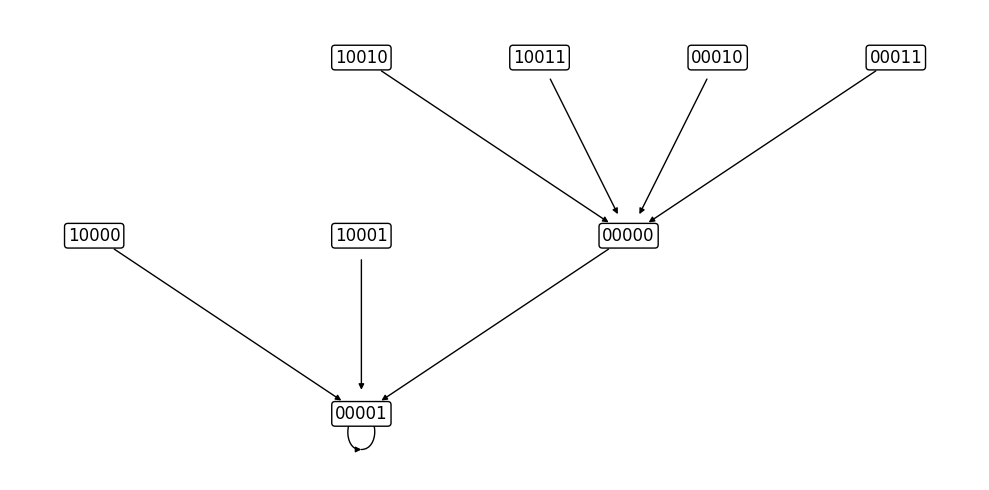

In [11]:
G1 = boolforge.compress_trajectories([([4,0],1),([0],1)], 3)

T = [([0,1],1),([1],1),([2,0,1],1),([3,0,1],1)]
G2 = boolforge.compress_trajectories(T, 2)

boolforge.plot_trajectory(boolforge.product_of_trajectories(G1, G2), False);

This is Figure 11c from the Dynamics Decomposition manuscript.

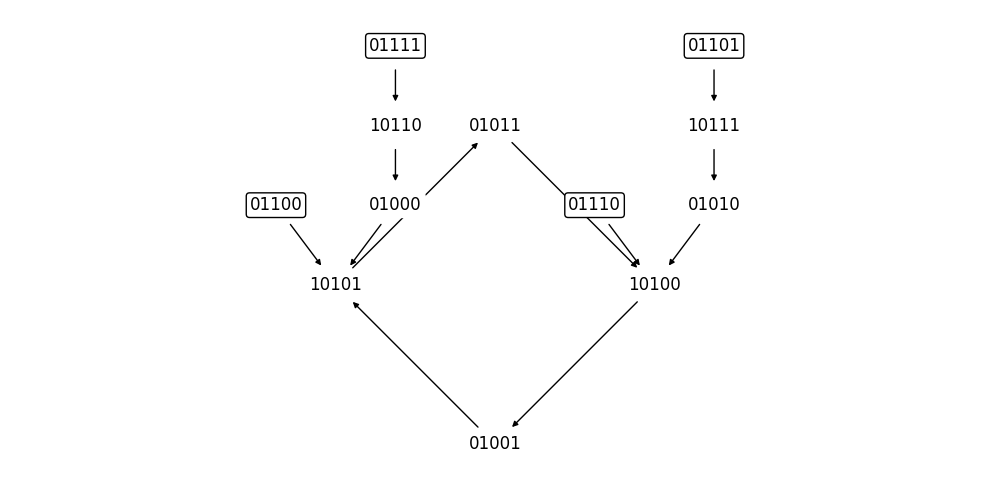

In [12]:
G1 = boolforge.compress_trajectories([([3,5,2],2)], 3)

T = [
     ([0,1,3,0,1],4),
     ([1,3,2,0,1,1,3],4),
     ([2,0,1,1,3],4),
     ([3,2,0,1,3,0,1],4)
]
G2 = boolforge.compress_trajectories(T, 2)

boolforge.plot_trajectory(boolforge.product_of_trajectories(G1, G2), False);

This is Figure 11d from the Dynamics Decomposition manuscript.

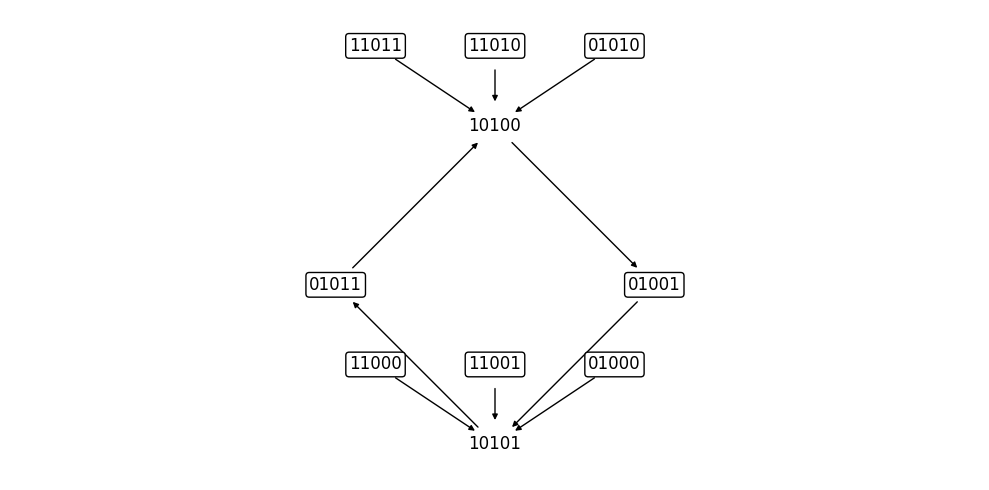

In [13]:
G1 = boolforge.compress_trajectories([([6,5,2],2),([2,5],2)], 3)

T = [
     ([0,1,3,0,1],4),
     ([1,1,3,0],4),
     ([2,0,1,1,3],4),
     ([3,0,1,1],4)
]
G2 = boolforge.compress_trajectories(T, 2)

boolforge.plot_trajectory(boolforge.product_of_trajectories(G1, G2), False);

This is Figure 11e from the Dynamics Decomposition manuscript.

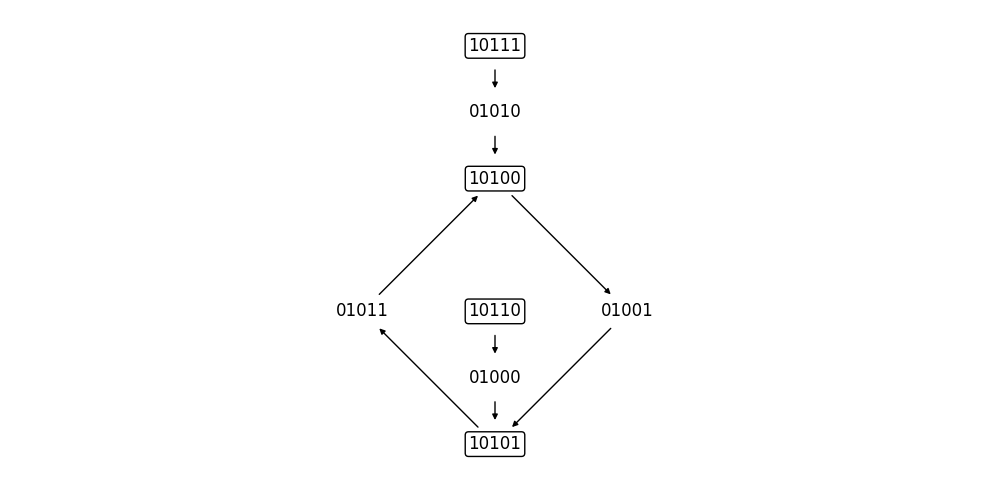

In [14]:
G1 = boolforge.compress_trajectories([([5,2],2)], 3)

T = [
     ([0,1,1,3],4),
     ([1,3,0,1],4),
     ([2,0,1,3,0,1],4),
     ([3,2,0,1,1,3],4)
]
G2 = boolforge.compress_trajectories(T, 2)

boolforge.plot_trajectory(boolforge.product_of_trajectories(G1, G2), False);

This is Figure 11f from the Dynamics Decomposition manuscript.

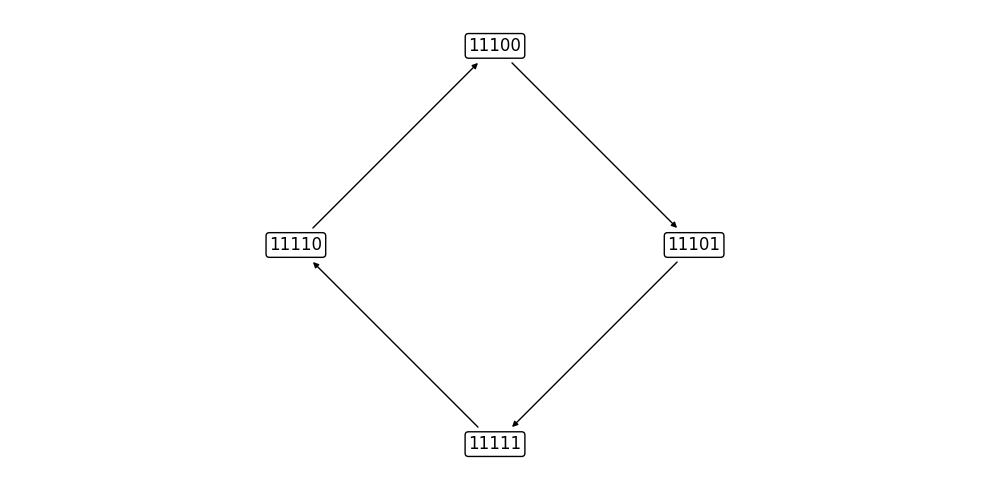

In [15]:
G1 = boolforge.compress_trajectories([([7],1)], 3)
G2 = boolforge.compress_trajectories([([0,1,3,2],4),([1,3,2,0],4),([3,2,0,1],4),([2,0,1,3],4)], 2)
boolforge.plot_trajectory(boolforge.product_of_trajectories(G1, G2), False);